<a href="https://colab.research.google.com/github/kunal24bit/Outlier-detection-and-its-treatment/blob/main/Outlier_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**What is an outlier?**

An outlier is a datapoint in a data set that distant from all other observations.

**How to find outlier in a dataset?**

There are so many ways to find the outlier in the given dataset:

1. Using Boxplot
2. Using Z -Score
3. Using IQR(Inter quartile range)
4. Using scatter plots

**Criteria to detect outlier**

1. if using box plot then the data point which falls below the (Q1-1.5*IQR) or the data point which falls above the (Q3+1.5*IQR) are outliers.

2. A standard cut-off value for finding outliers are Z-scores of +/-3 or further from zero.

In [141]:
import numpy as np

import pandas as pd

In [142]:
df  = pd.read_csv("Outliers1.csv")

In [143]:
df

,Height M
0,1.589492
1,1.650782
2,1.713147
3,1.713566
4,1.721237
5,1.729618
6,1.734295
7,1.766343
8,1.801769
9,1.839402


In [144]:
import matplotlib.pyplot as plt

In [145]:
print(df["Height M"].mean())

print(df["Height M"].std())

2.3965177826666673
2.33216940956709


**Detecting the outlier using Boxplot**

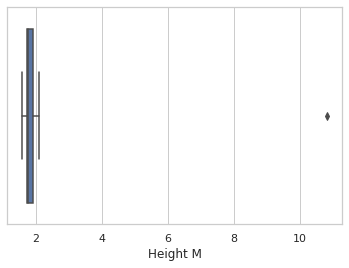

In [146]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["Height M"])

In [147]:
Q1 = np.percentile(df["Height M"], 25)

Q3 = np.percentile(df["Height M"], 75)

IQR = Q3-Q1


**Impact of the outlier**

1. Problematic for statistical analysis
 

**Removing Outlier**

In [148]:
df.drop(df.index[df['Height M']> (Q3+1.5*IQR)], inplace = True)

In [149]:
df

,Height M
0,1.589492
1,1.650782
2,1.713147
3,1.713566
4,1.721237
5,1.729618
6,1.734295
7,1.766343
8,1.801769
9,1.839402


In [150]:
print(df["Height M"].mean())

print(df["Height M"].std())

1.7953026242857144
0.13577928039796566


A single value changes the mean height by 0.6m (2 feet) and the standard deviation by a whopping 2.16m (7 feet).

**Using Z score**

A standard cut-off value for finding outliers are Z-scores of +/-3 or further from zero.

To find the Z score use the formula:

Z = (x -mean)/std

In [151]:
df1 = pd.read_csv("Outliers1.csv")
df1

,Height M
0,1.589492
1,1.650782
2,1.713147
3,1.713566
4,1.721237
5,1.729618
6,1.734295
7,1.766343
8,1.801769
9,1.839402


In [152]:
mean =  np.mean(df1["Height M"])
std = np.std(df1["Height M"])

list = []
def z_score(data):
  for i in data:
    list.append((i-mean)/std)
  return list



In [153]:
zscore = z_score(df1["Height M"])
threshold = 3;
for i in zscore:
  if i>threshold:
    print("outlier for the given dataset is", i)

outlier for the given dataset is 3.7357643616616953


In [154]:
df1["zscore"] = zscore

In [155]:
df1

,Height M,zscore
0,1.589492,-0.358186
1,1.650782,-0.330984
2,1.713147,-0.303304
3,1.713566,-0.303118
4,1.721237,-0.299713
5,1.729618,-0.295994
6,1.734295,-0.293918
7,1.766343,-0.279693
8,1.801769,-0.263970
9,1.839402,-0.247267


In [156]:
df1.drop(df1.index[df1["zscore"]> 3], inplace = True)

In [157]:
df1

,Height M,zscore
0,1.589492,-0.358186
1,1.650782,-0.330984
2,1.713147,-0.303304
3,1.713566,-0.303118
4,1.721237,-0.299713
5,1.729618,-0.295994
6,1.734295,-0.293918
7,1.766343,-0.279693
8,1.801769,-0.263970
9,1.839402,-0.247267
